In [3]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, excluding the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize images to 224x224 to match VGG16 input size
#x_train_resized = tf.image.resize(x_train, (224, 224))
#x_test_resized = tf.image.resize(x_test, (224, 224))

# Normalize pixel values to [0, 1]
x_train_resized = x_train / 255.0
x_test_resized = x_test/ 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [5]:
# Freeze all the layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False


In [6]:
from tensorflow.keras import layers, models

# Add custom layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Create data generators with augmentations
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train_resized)

# Train the model
history_finetune = model.fit(datagen.flow(x_train_resized, y_train, batch_size=32), epochs=10, validation_data=(x_test_resized, y_test))


Epoch 1/10


c:\Users\SAYYED ASJAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 468s 287ms/step - accuracy: 0.3748 - loss: 1.7539 - val_accuracy: 0.5288 - val_loss: 1.3405
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 358s 229ms/step - accuracy: 0.4950 - loss: 1.4292 - val_accuracy: 0.5609 - val_loss: 1.2551
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 392s 251ms/step - accuracy: 0.5081 - loss: 1.3907 - val_accuracy: 0.5637 - val_loss: 1.2442
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 376s 241ms/step - accuracy: 0.5239 - loss: 1.3579 - val_accuracy: 0.5693 - val_loss: 1.2152
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 238ms/step - accuracy: 0.5261 - loss: 1.3413 - val_accuracy: 0.5809 - val_loss: 1.1954
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 364s 233ms/step - accuracy: 0.5343 - loss: 1.3251 - val_accuracy: 0.5762 - val_loss: 1.1978
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 375s 240ms/step - accuracy: 0.5338 - loss: 1.3198 - val_accuracy: 0.5854 - val_loss: 1.1871
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 414s 265ms/step - accuracy: 0.5

In [8]:
# Evaluate the model
test_loss_finetune, test_acc_finetune = model.evaluate(x_test_resized, y_test, verbose=2)
print(f"Test accuracy (fine-tuned): {test_acc_finetune:.4f}")


313/313 - 60s - 192ms/step - accuracy: 0.5819 - loss: 1.1799
Test accuracy (fine-tuned): 0.5819


In [10]:
# Define a new simple CNN model
def create_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile the model
model_scratch = create_simple_cnn()
model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model from scratch
history_scratch = model_scratch.fit(x_train_resized, y_train, epochs=10, validation_data=(x_test_resized, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.3630 - loss: 1.7290 - val_accuracy: 0.5412 - val_loss: 1.2752
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5892 - loss: 1.1511 - val_accuracy: 0.6359 - val_loss: 1.0394
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6631 - loss: 0.9560 - val_accuracy: 0.6641 - val_loss: 0.9744
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7098 - loss: 0.8314 - val_accuracy: 0.7044 - val_loss: 0.8768
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7474 - loss: 0.7261 - val_accuracy: 0.7173 - val_loss: 0.8222
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7662 - loss: 0.6703 - val_accuracy: 0.7073 - val_loss: 0.8561
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7883 - loss: 0.6052 - val_accuracy: 0.7217 - val_loss: 0.8382
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8028 -

In [11]:
# Evaluate the model trained from scratch
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(x_test_resized, y_test, verbose=2)
print(f"Test accuracy (from scratch): {test_acc_scratch:.4f}")


313/313 - 2s - 6ms/step - accuracy: 0.7332 - loss: 0.8630
Test accuracy (from scratch): 0.7332


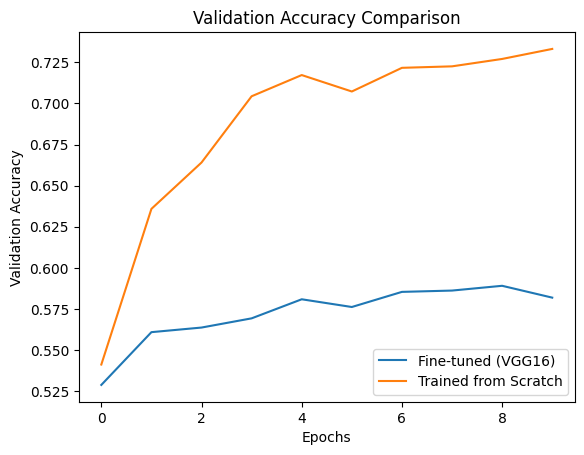

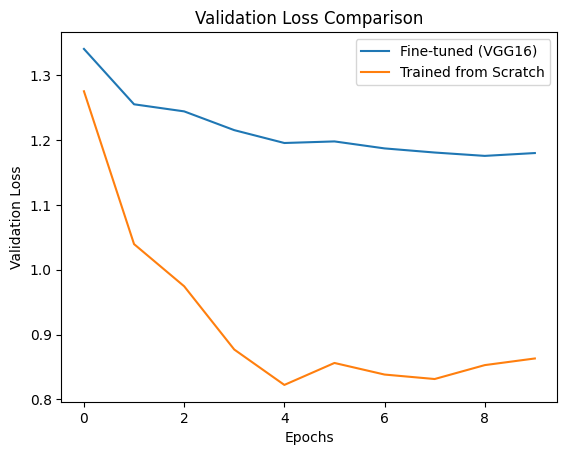

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.plot(history_finetune.history['val_accuracy'], label='Fine-tuned (VGG16)')
plt.plot(history_scratch.history['val_accuracy'], label='Trained from Scratch')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot loss comparison
plt.plot(history_finetune.history['val_loss'], label='Fine-tuned (VGG16)')
plt.plot(history_scratch.history['val_loss'], label='Trained from Scratch')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
